In [276]:
# load data and imports
import pandas as pd
import seaborn as sbn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

clean_titanic_df = pd.read_csv('preprocessed_titanic.csv')

clean_titanic_df = clean_titanic_df.drop(columns=['Name', 'PassengerId', 'Unnamed: 0'])

train, test= train_test_split(clean_titanic_df,random_state=23, test_size = 0.2)

X_train, y_train = train.drop(columns=['Survived']), train['Survived']
X_test, y_test = test.drop(columns=['Survived']), test['Survived']

clean_titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


   Pclass  Survived
0       1  0.626437
1       2  0.490066
2       3  0.245478
   Sex  Survived
0    0  0.190789
1    1  0.746094
   Embarked  Survived
0         0  0.338521
1         1  0.570423
2         2  0.410714


'""\nInsights and further adjustemnts to the data:\n\n    Survival is correlated to age, fare, class, and sex. \n    \n    based on the the histograms below:\n    \n        - people who did not survive were mainly around 30 years old and older.\n        \n        - people who did survive were 30 years old and younger. There is special density in the group of age<5.\n        \n        - Most people who belonged to the first class survived\n        \n        - most people who belonged to the third class did not survive\n        \n        - most people who did not survive did not pay a fare over 50 dollars\n    \n    possible data tunning:\n        \n        - consider turning age and fare into categorical data by using bins\n        \n        - combine SibSp and Parch into one column. Possibily turn it into a binary category of family and no family\n    \n'

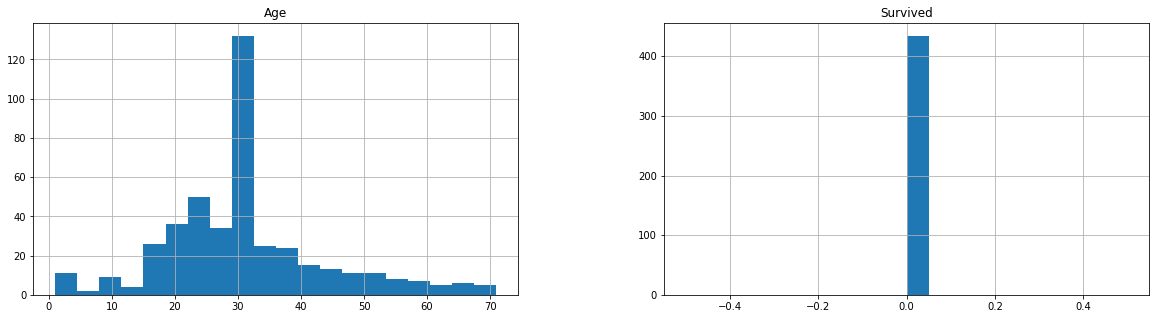

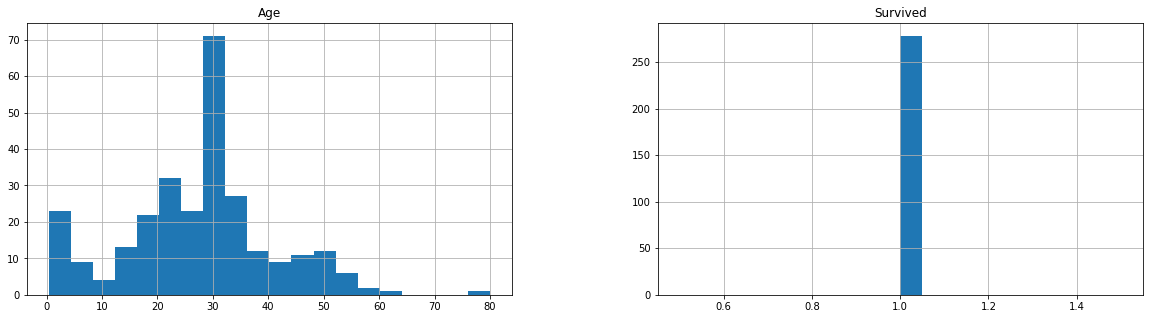

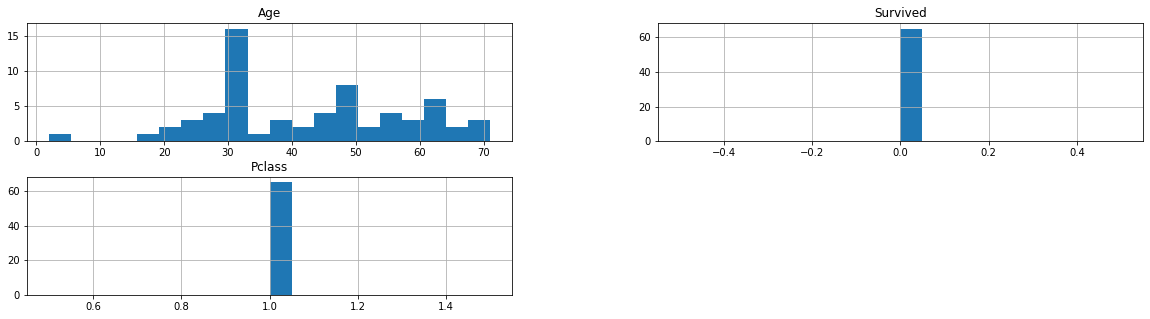

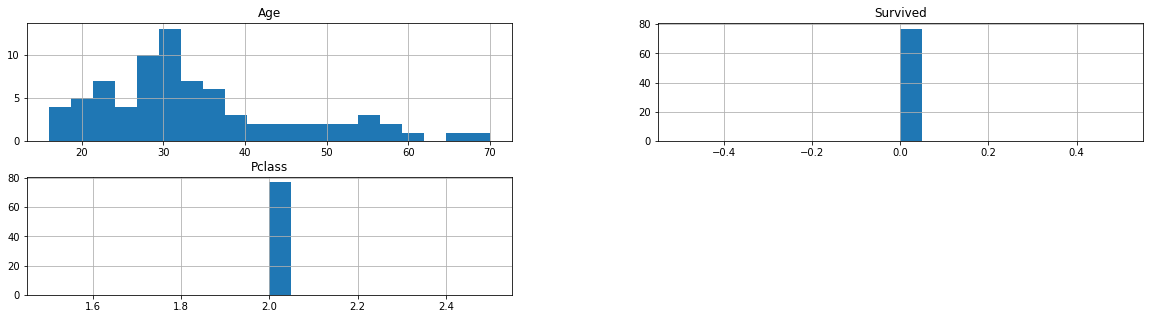

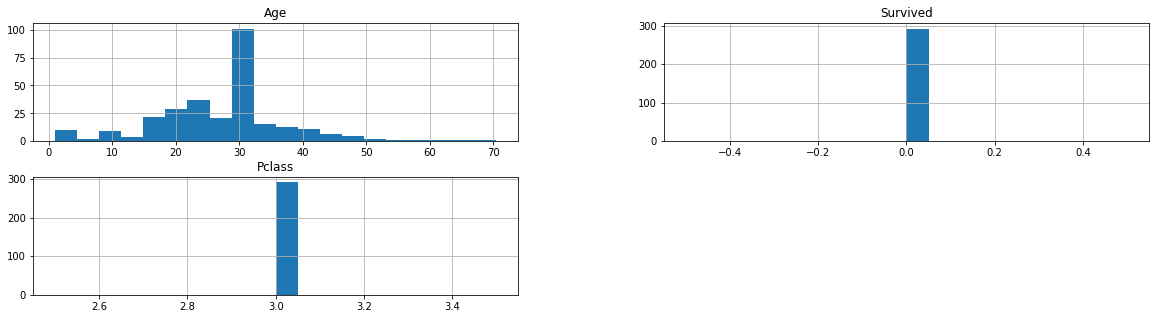

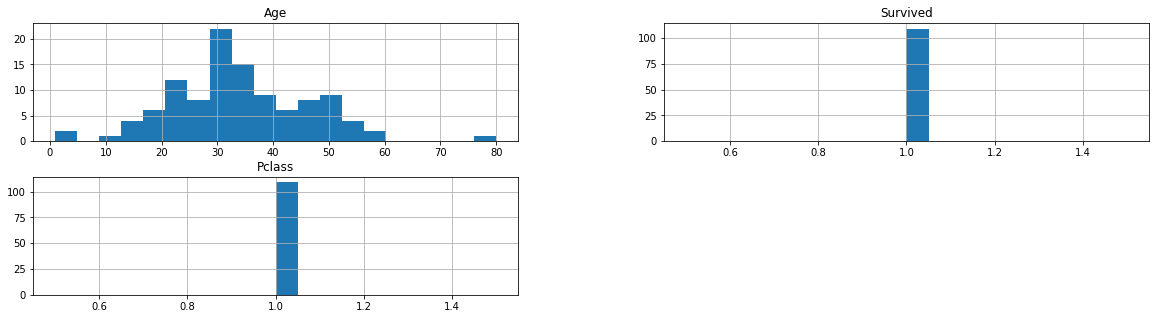

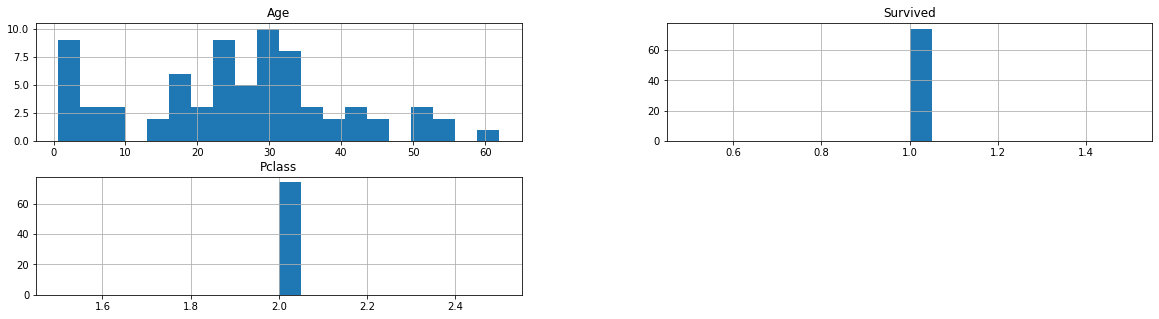

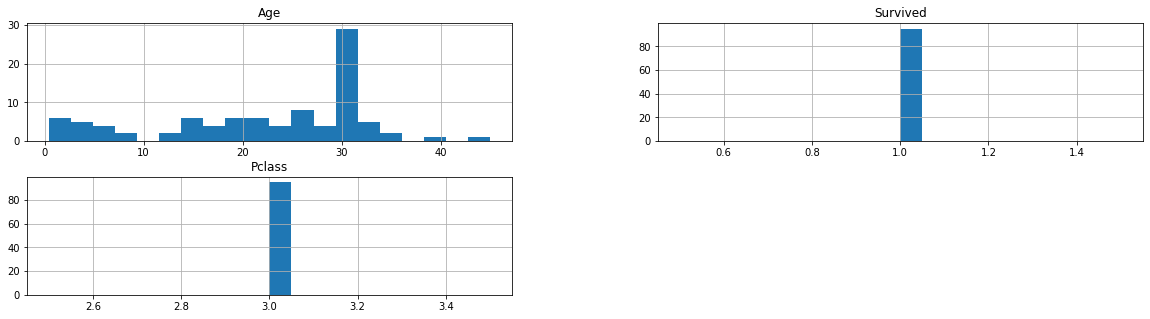

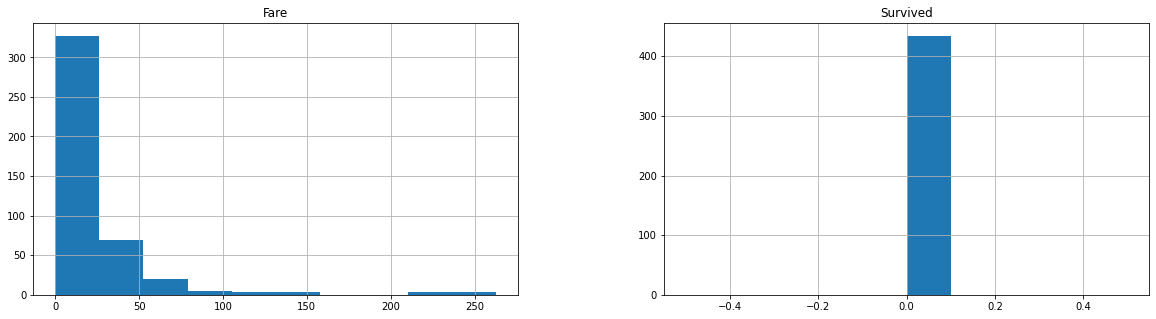

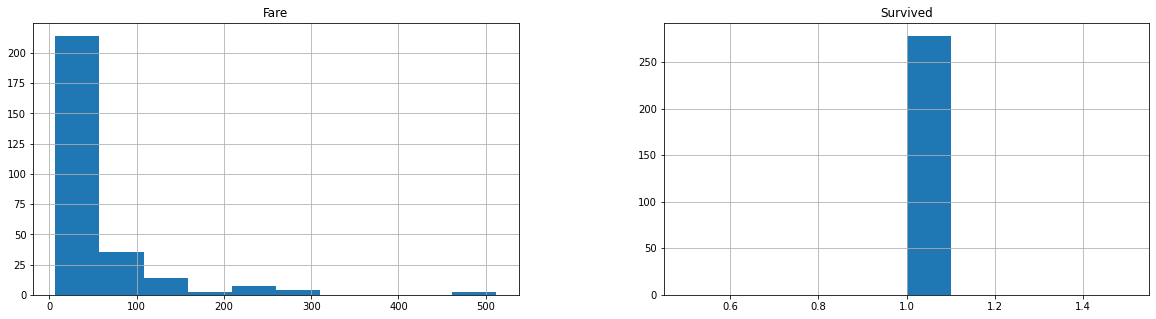

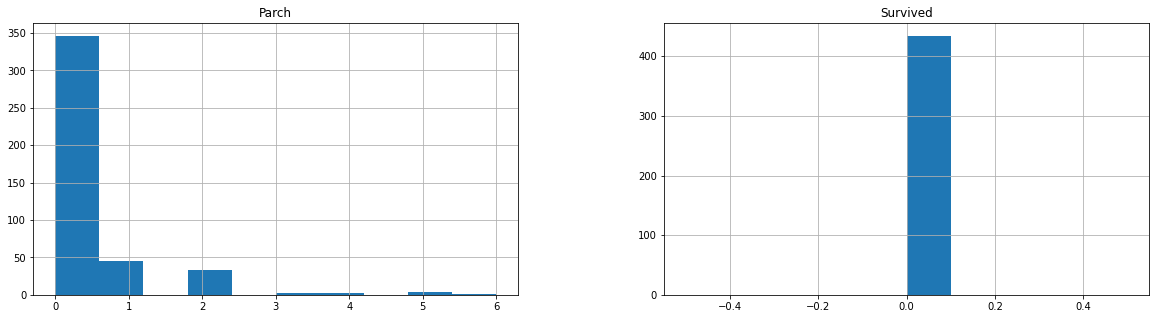

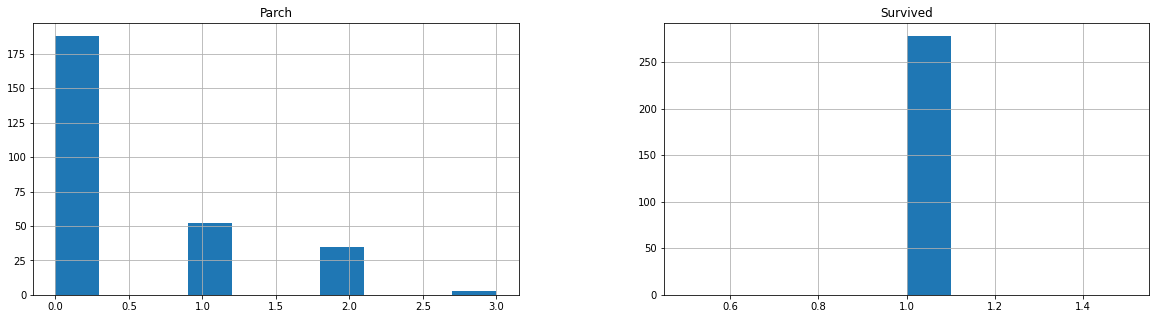

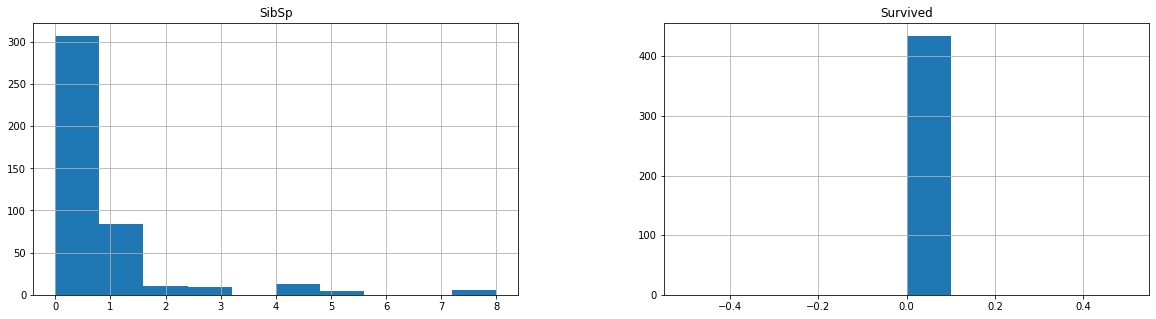

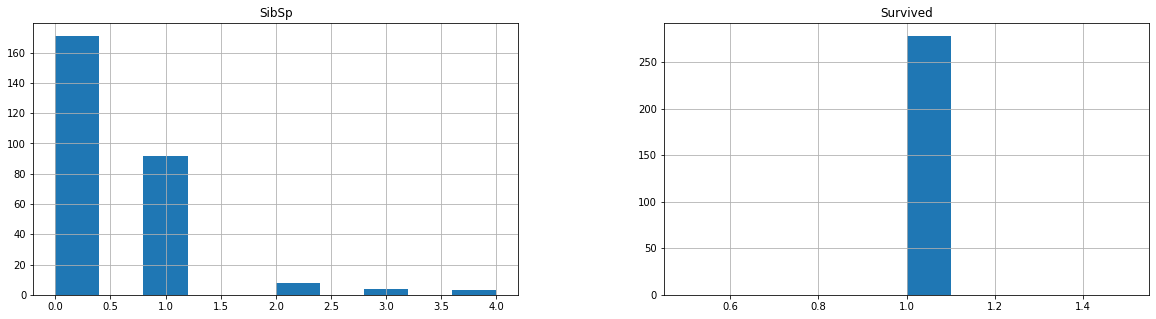

In [257]:
"""""
First visualize the data to look for correlation or other patterns
"""""

# check correlation between pairs of features. We are gonna see the average of people who survived by category for each categoric feature

survived_class = train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(survived_class)

survived_sex = train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by='Sex')
print(survived_sex)

survived_embarked = train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Embarked')
print(survived_embarked)

# using histograms to visualize correlation between numerical data and survival
# graph = sbn.FacetGrid(train, col = 'Survived')
# graph.map(plt.hist, 'Age', bins = 20)

# correlating age with survival
train[['Age', 'Survived']].groupby('Survived').hist(bins=20, figsize = (20, 5))

# correlating age and class with survival
train[['Age', 'Survived', 'Pclass']].groupby(['Survived', 'Pclass']).hist(bins=20, figsize = (20, 5))

# correlating fare with survival
train[['Fare', 'Survived']].groupby(['Survived']).hist(bins=10, figsize = (20, 5))

# correlating fare with survival
train[['Parch', 'Survived']].groupby(['Survived']).hist(bins=10, figsize = (20, 5))

train[['SibSp', 'Survived']].groupby(['Survived']).hist(bins=10, figsize = (20, 5))

"""""
Insights and further adjustemnts to the data:

    Survival is correlated to age, fare, class, and sex. 
    
    based on the the histograms below:
    
        - people who did not survive were mainly around 30 years old and older.
        
        - people who did survive were 30 years old and younger. There is special density in the group of age<5.
        
        - Most people who belonged to the first class survived
        
        - most people who belonged to the third class did not survive
        
        - most people who did not survive did not pay a fare over 50 dollars
    
    possible data tunning:
        
        - consider turning age and fare into categorical data by using bins
        
        - combine SibSp and Parch into one column. Possibily turn it into a binary category of family and no family
    
"""""





In [258]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lor = LogisticRegression(penalty= 'none', max_iter= 1000, solver='newton-cg').fit(X_train, y_train)
print(classification_report(y_test, lor.predict(X_test)))
print(lor.score(X_test, y_test))



              precision    recall  f1-score   support

           0       0.81      0.82      0.81       115
           1       0.67      0.66      0.66        64

    accuracy                           0.76       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.76      0.76      0.76       179

0.7597765363128491


In [259]:
# categorical bayes classifier

from sklearn.naive_bayes import CategoricalNB

categorical_X = clean_titanic_df[['Pclass', 'Sex', 'Embarked']]
categorical_y = clean_titanic_df['Survived']

categorical_NB = CategoricalNB()
categorical_NB.fit(X_train, y_train)
print(classification_report(y_test, categorical_NB.predict(X_test)))
print(categorical_NB.score(X_test, y_test))


              precision    recall  f1-score   support

           0       0.81      0.89      0.85       115
           1       0.75      0.62      0.68        64

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.79      0.79      0.79       179

0.7932960893854749


In [260]:
# gaussian bayes classifier 

from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
numericaldata = X_train[]
NB.fit(X_train, y_train)
print(classification_report(y_test, NB.predict(X_test)))
print(NB.score(X_test, y_test))


              precision    recall  f1-score   support

           0       0.85      0.89      0.87       115
           1       0.78      0.72      0.75        64

    accuracy                           0.83       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.83      0.83       179

0.8268156424581006


In [263]:
# support vector machine 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = SVC(kernel = 'linear')

# scale numerical attributes
scaler = StandardScaler()
scaled_numerical_columns = scaler.fit_transform(X_train[['Age', 'Fare']])
X_train[['Age', 'Fare']] = scaled_numerical_columns
svm_y_train = y_train.replace({0: -1})

scaled_numerical_columns = scaler.fit_transform(X_test[['Age', 'Fare']])
X_test[['Age', 'Fare']] = scaled_numerical_columns
svm_y_test = y_test.replace({0: -1})

clf.fit(X_train, svm_y_train.to_numpy() )



print(classification_report(svm_y_test, clf.predict(X_test)))
print(clf.score(X_test, svm_y_test))
X_train

              precision    recall  f1-score   support

          -1       0.82      0.86      0.84       115
           1       0.72      0.66      0.69        64

    accuracy                           0.79       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.78      0.79      0.79       179

0.7877094972067039


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
151,1,1,-0.571912,1,0,0.677439,0
753,3,0,-0.495775,0,0,-0.496656,0
746,3,0,-1.028731,1,1,-0.249570,0
684,2,0,2.321278,1,1,0.125434,0
887,1,1,-0.800322,0,0,-0.054568,0
...,...,...,...,...,...,...,...
31,1,1,0.014272,1,0,2.275871,1
488,3,0,0.037181,0,0,-0.493572,0
40,3,1,0.798546,1,0,-0.465072,0
742,1,1,-0.648048,2,2,4.592978,1


In [264]:
# results upon data readjustment

# create age categories (DO NO RUN THIS CELL TWICE! IF RAN A SECOND TIME, MOST VALUES WILL BE TURNED INTO 1):
age_bins = pd.cut( clean_titanic_df['Age'], 10, retbins = True)

i = 0
j = 0
while i < 72:
    clean_titanic_df.loc[(clean_titanic_df['Age'] > i) &  (clean_titanic_df['Age'] <= i +8), 'Age'] = j
    j += 1
    i += 8



In [265]:
# create Fare category

fare_bins = pd.qcut(clean_titanic_df['Fare'], 5, retbins = True)
print(fare_bins)

clean_titanic_df.loc[clean_titanic_df['Fare'] <= 7, 'Fare'] = 0
clean_titanic_df.loc[(clean_titanic_df['Fare'] > 7) & (clean_titanic_df['Fare'] <= 10 ), 'Fare'] = 1
clean_titanic_df.loc[(clean_titanic_df['Fare'] > 10) & (clean_titanic_df['Fare'] <= 21 ), 'Fare'] = 2
clean_titanic_df.loc[(clean_titanic_df['Fare'] > 21) & (clean_titanic_df['Fare'] <= 40 ), 'Fare'] = 3
clean_titanic_df.loc[clean_titanic_df['Fare'] > 40 , 'Fare'] = 4

(0        (-0.001, 7.854]
1      (39.688, 512.329]
2          (7.854, 10.5]
3      (39.688, 512.329]
4          (7.854, 10.5]
             ...        
886       (10.5, 21.679]
887     (21.679, 39.688]
888     (21.679, 39.688]
889     (21.679, 39.688]
890      (-0.001, 7.854]
Name: Fare, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]], array([  0.    ,   7.8542,  10.5   ,  21.6792,  39.6875, 512.3292]))


In [266]:
train, test= train_test_split(clean_titanic_df,random_state=23, test_size = 0.2)

X_train, y_train = train.drop(columns=['Survived']), train['Survived']
X_test, y_test = test.drop(columns=['Survived']), test['Survived']


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
151,1,1,2.0,1,0,4.0,0
753,3,0,2.0,0,0,1.0,0
746,3,0,1.0,1,1,2.0,0
684,2,0,7.0,1,1,3.0,0
887,1,1,2.0,0,0,3.0,0
...,...,...,...,...,...,...,...
31,1,1,3.0,1,0,4.0,1
488,3,0,3.0,0,0,1.0,0
40,3,1,4.0,1,0,1.0,0
742,1,1,2.0,2,2,4.0,1


In [267]:
# rerun the support vector machine

clf2 = SVC(kernel = 'linear')
clf2.fit(X_train, svm_y_train.to_numpy())
print(classification_report(svm_y_test, clf2.predict(X_test)))
print(clf2.score(X_test, svm_y_test))

              precision    recall  f1-score   support

          -1       0.82      0.86      0.84       115
           1       0.72      0.66      0.69        64

    accuracy                           0.79       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.78      0.79      0.79       179

0.7877094972067039


In [274]:
# rerun the categorical bayes classifier

categorical_NB2 = CategoricalNB()
categorical_NB2.fit(X_train, y_train)
print(classification_report(y_test, categorical_NB2.predict(X_test)))
print(categorical_NB2.score(X_test, y_test))


              precision    recall  f1-score   support

           0       0.81      0.89      0.85       115
           1       0.75      0.62      0.68        64

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.79      0.79      0.79       179

0.7932960893854749


In [275]:
# rerun the logistic regression model

lor2 = LogisticRegression(penalty= 'none', max_iter= 1000, solver='newton-cg').fit(X_train, y_train)
print(classification_report(y_test, lor2.predict(X_test)))
print(lor2.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       115
           1       0.67      0.66      0.66        64

    accuracy                           0.76       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.76      0.76      0.76       179

0.7597765363128491
